# Parta A.p5

# 1) Configuraciones iniciales

## 1.1) Imports iniciales

In [3]:
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from funpymodeling import status

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.classifier import DiscriminationThreshold

import pickle

import mlflow.sklearn

In [4]:
# Configuraciones
pd.set_option('display.max_columns', None)

## 1.2) Lectura de datos

In [5]:
data = pd.read_csv("../data/ohe_customer_dataset.csv", sep=',') 


In [6]:
data.head()

,transactionFailed,fraudulent,"orderAmount_(9.999, 18.4]","orderAmount_(18.4, 30.0]","orderAmount_(30.0, 39.0]","orderAmount_(39.0, 47.0]","orderAmount_(47.0, 353.0]",orderAmount_unknown,orderState_failed,orderState_fulfilled,orderState_pending,paymentMethodRegistrationFailure_False,paymentMethodRegistrationFailure_True,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,paymentMethodProvider_American Express,paymentMethodProvider_Diners Club / Carte Blanche,paymentMethodProvider_Discover,paymentMethodProvider_JCB 15 digit,paymentMethodProvider_JCB 16 digit,paymentMethodProvider_Maestro,paymentMethodProvider_Mastercard,paymentMethodProvider_VISA 13 digit,paymentMethodProvider_VISA 16 digit,paymentMethodProvider_Voyager,paymentMethodIssuer_Bastion Banks,paymentMethodIssuer_Bulwark Trust Corp.,paymentMethodIssuer_Citizens First Banks,paymentMethodIssuer_Fountain Financial Inc.,paymentMethodIssuer_Grand Credit Corporation,paymentMethodIssuer_Her Majesty Trust,paymentMethodIssuer_His Majesty Bank Corp.,paymentMethodIssuer_Rose Bancshares,paymentMethodIssuer_Solace Banks,paymentMethodIssuer_Vertex Bancorp,paymentMethodIssuer_weird,"transactionAmount_(9.999, 22.0]","transactionAmount_(22.0, 34.0]","transactionAmount_(34.0, 46.0]","transactionAmount_(46.0, 353.0]",emailDomain_biz,emailDomain_com,emailDomain_info,emailDomain_net,emailDomain_org,emailDomain_weird,emailProvider_gmail,emailProvider_hotmail,emailProvider_other,emailProvider_weird,emailProvider_yahoo,customerIPAdress_checked_long_address,customerIPAdress_checked_short_address,sameCity_no,sameCity_unknown,sameCity_yes
0,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True
1,False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False
2,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,False,False
3,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,False,False
4,True,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   transactionFailed                                  819 non-null    bool 
 1   fraudulent                                         819 non-null    bool 
 2   orderAmount_(9.999, 18.4]                          819 non-null    bool 
 3   orderAmount_(18.4, 30.0]                           819 non-null    bool 
 4   orderAmount_(30.0, 39.0]                           819 non-null    bool 
 5   orderAmount_(39.0, 47.0]                           819 non-null    bool 
 6   orderAmount_(47.0, 353.0]                          819 non-null    bool 
 7   orderAmount_unknown                                819 non-null    bool 
 8   orderState_failed                                  819 non-null    bool 
 9   orderState_fulfilled            

# 2) Clasificación

## 2.1) Separación de datos

In [8]:
X = data.drop('fraudulent', axis=1)
y= data['fraudulent']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =42 )

## 2.2) Modelo Predictivo

In [10]:
rf = RandomForestClassifier(n_estimators=500, random_state=99, n_jobs=2)

rf.fit(x_train, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 2.3) Predicciones

In [11]:
# training
pred_tr=rf.predict_proba(x_train)

# testing
pred_ts=rf.predict_proba(x_test)

In [12]:
y_prob_tr=pred_tr[:,1]
y_prob_ts=pred_ts[:,1]

In [13]:
y_prob_tr

array([0.7807868 , 0.49469646, 0.89155079, 0.1295    , 0.72517338,
       0.72517338, 0.02683333, 0.54223593, 0.54223593, 0.87363333,
       0.54983409, 0.162     , 0.40669845, 0.822     , 0.1303026 ,
       0.72517338, 0.41854348, 0.91929223, 0.41854348, 0.28674825,
       0.40669845, 0.968     , 0.76314715, 0.2840441 , 0.266     ,
       0.80693773, 0.54983409, 0.90931618, 0.86447252, 0.93      ,
       0.54223593, 0.83      , 0.07584286, 0.89266667, 0.41854348,
       0.84068568, 0.79340417, 0.76314715, 0.19746667, 0.72548333,
       0.72517338, 0.87916667, 0.41854348, 0.76314715, 0.80628571,
       0.84302251, 0.54983409, 0.67152889, 0.17958095, 0.67152889,
       0.40669845, 0.094     , 0.23797436, 0.72517338, 0.72517338,
       0.078     , 0.67152889, 0.54223593, 0.734     , 0.09625   ,
       0.93321429, 0.048     , 0.91335002, 0.07880952, 0.72517338,
       0.54983409, 0.76314715, 0.54223593, 0.54983409, 0.67152889,
       0.11325   , 0.32278965, 0.774     , 0.76      , 0.147  

El punto de corte por defecto es 0.5, voy a actualizarlo a la media.

In [14]:
y_prob_tr.mean()

0.5502117016607009

In [15]:
y_prob_ts.mean()

0.5496695034023579

In [16]:
pred_tr_2 =np.where(y_prob_tr > 0.55, 1, 0)
pred_ts_2 =np.where(y_prob_ts > 0.55, 1, 0)

In [17]:
pred_tr_2

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,

In [30]:
accuracy_train =accuracy_score(y_train, pred_tr_2, normalize=True)
accuracy_train

0.8150087260034904

In [31]:
# Accuracy en test
accuracy_test = accuracy_score(y_test, pred_ts_2, normalize=True)
accuracy_test

0.6463414634146342

## 2.4) Matriz de confusión

In [20]:
count = pd.Series(pred_tr_2).value_counts()
count

0    292
1    281
Name: count, dtype: int64

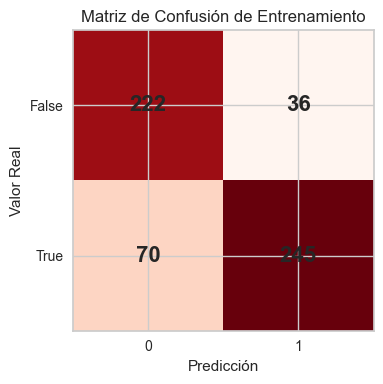

In [21]:
# Matriz de confusión de TRAIN
conf_mat_abs = pd.crosstab(index=y_train, 
                          columns=pred_tr_2,     
                          rownames=['Actual'], 
                          colnames=['Pred'])

fig, ax = plt.subplots(figsize=(6, 4))
im = ax.imshow(conf_mat_abs, cmap='Reds')

for i in range(conf_mat_abs.shape[0]):
    for j in range(conf_mat_abs.shape[1]):
        text = ax.text(j, i, conf_mat_abs.iloc[i, j],
                      ha="center", va="center", 
                      fontsize=16, 
                      weight='bold')


ax.set_xticks(range(conf_mat_abs.shape[1]))
ax.set_yticks(range(conf_mat_abs.shape[0]))
ax.set_xticklabels(conf_mat_abs.columns)
ax.set_yticklabels(conf_mat_abs.index)
ax.set_xlabel('Predicción')
ax.set_ylabel('Valor Real')
ax.set_title('Matriz de Confusión de Entrenamiento')

plt.tight_layout()
plt.show()

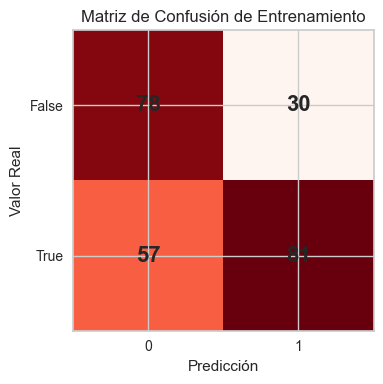

In [22]:
# Matriz de confusion de TEST

conf_mat_abs = pd.crosstab(index=y_test, 
                          columns=pred_ts_2,     
                          rownames=['Actual'], 
                          colnames=['Pred'])

fig, ax = plt.subplots(figsize=(6, 4))
im = ax.imshow(conf_mat_abs, cmap='Reds')

for i in range(conf_mat_abs.shape[0]):
    for j in range(conf_mat_abs.shape[1]):
        text = ax.text(j, i, conf_mat_abs.iloc[i, j],
                      ha="center", va="center", 
                      fontsize=16, 
                      weight='bold')


ax.set_xticks(range(conf_mat_abs.shape[1]))
ax.set_yticks(range(conf_mat_abs.shape[0]))
ax.set_xticklabels(conf_mat_abs.columns)
ax.set_yticklabels(conf_mat_abs.index)
ax.set_xlabel('Predicción')
ax.set_ylabel('Valor Real')
ax.set_title('Matriz de Confusión de Entrenamiento')

plt.tight_layout()
plt.show()

Las conclusiones se realizaran al final de evaluar F1-Score y ROC Curve

## 2.5) F1-Score

In [23]:
F1_train = f1_score(y_train, pred_tr_2)
F1_test = f1_score(y_test, pred_ts_2)

print(f'F1-Score en train: {F1_train}')
print(f'F1-Score en test: {F1_test}')

F1-Score en train: 0.8221476510067114
F1-Score en test: 0.6506024096385542


## 2.6) Curva ROC

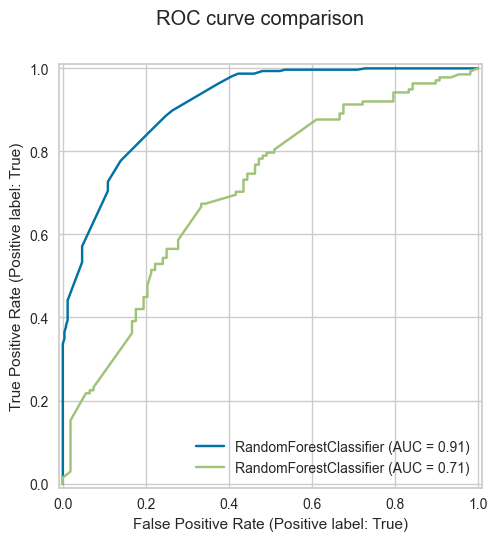

In [24]:
tr_disp = RocCurveDisplay.from_estimator(rf, x_train, y_train)
ts_disp = RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

## 2.7) Análisis de los distintos puntos de corte

c:\Users\ASUS\Documents\GitHub\final_project\env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


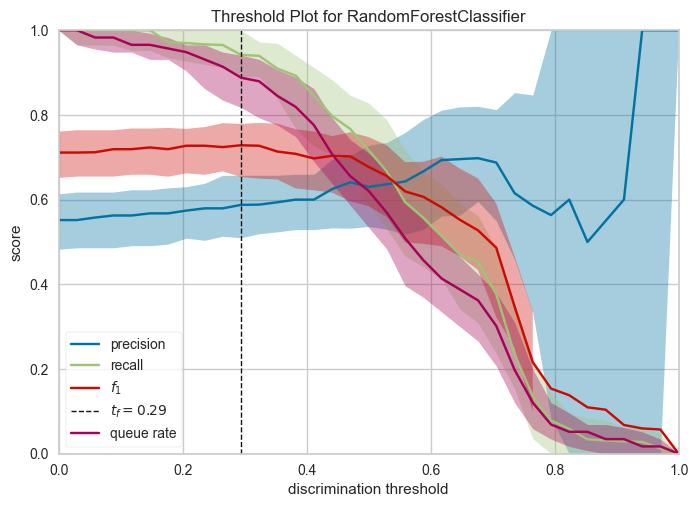

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [25]:
visualizer = DiscriminationThreshold(rf)

visualizer.fit(x_train, y_train)        # Ajustar data al visualizador
visualizer.show()                       # Mostrar figura

## 2.8) Conclusiones del Modelo

Considerando las disintas métricas, se procede a realizar un análisis global del rendimiento del modelo:
- El rendimiento global del modelo no es el mejor, tiene margen de mejora.
- Las métricas como accuracy y f1-score indican que no todas las transacciones fraudulentas en la práctica van a ser detectadas, configurar el punto de corte a un valor inferior para unas primeras inferencias del modelo va a ser fundamental hasta tener mayor data de mejor calidad, ya que en este modelo de negocio el error tipo II (Falsos negativos) es crítico, conviene enviar notificaciones de seguridad antes que dejar pasar transacciones fraudulentas.
- Se debe considerar que todo el analisis actual proviene de una decision sobre el anidado de los json.
- La mejora del modelo actual no necesariamente se dará en función de más datos y de mejor calidad, se puede iterar el proceso con una retroalimentación en función de los resultados ya vistos. 
- También, se podriá analizar aun mas la distribución de los datos entre train y test. Es fundamental que SI la tengan porque sino "confunde" al modelo. No solamente de la variable objetivo sino también del resto.
- En resumen, el modelo puede ser usado bajando el threshold, disminuyendo la precision pero mejorando el recall, hasta obtener data nueva mientras se itera y mejora lo actual. Por ser una primera aproximación, es aceptable.

# 3) Guardado del modelo

In [26]:
filename = 'modelo_proyecto_final.pkl'
pickle.dump(rf, open(filename, 'wb')) # rf = nuestro modelo

# 4) Mflow

Trazabilidad del modelo

In [27]:
mlflow.set_experiment(experiment_name='proyecto_final')

<Experiment: artifact_location='file:///c:/Users/ASUS/Documents/GitHub/final_project/Parte_A/mlruns/221164997264950799', creation_time=1752164205376, experiment_id='221164997264950799', last_update_time=1752164205376, lifecycle_stage='active', name='proyecto_final', tags={}>

In [ ]:
### Parametros ###
# Tamaño del dataset
print(data.shape)
mlflow.log_param("Tamaño dataset", data.shape)


(819, 58)


TypeError: log_param() missing 1 required positional argument: 'value'

In [35]:
NUM_ESTIMATORS =500
RANDOM_STATE = 42

In [36]:

mlflow.log_param("Test Size", 0.3)
mlflow.log_param("Número de estimadores", NUM_ESTIMATORS)
mlflow.log_param("Valor semilla", RANDOM_STATE)

42

In [33]:
### Metricas ###
mlflow.log_metric("Accuracy en Train", accuracy_train)
mlflow.log_metric("Accuracy en Test", accuracy_test)
mlflow.log_metric("F1 en Train", F1_train)
mlflow.log_metric("F1 en Test", F1_test)
mlflow.log_metric("ROC train", 0.91)
mlflow.log_metric("ROC test", 0.91)

In [37]:
mlflow.sklearn.log_model(rf, "modelo_proyecto_final")

2025/07/10 17:34:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/10 17:35:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [38]:
!mlflow ui

^C
